# Lab Session 3, Hypothesis Testing and Confidence Interval

# 1. Explanations of regression statistics

### R-squared

In the same way as for the bi-variate regression:
$$
R^2=1-\frac{RSS}{\sum\limits_i (y_i-\overline{y})^2}=\frac{\sum\limits_i (\hat{y}_i-\overline{y})^2}{\sum\limits_i (y_i-\overline{y})^2},
$$
where $\overline{y}=\sum\limits_i y_i$ is the sample mean of observed values of responce variable. This way $R^2$ is often interpreted as a fraction of responce variable's variance explained by linear model. $R^2=1$ is equivalent to $RSS=0$, i.e. the model fits the observations exactly, i.e. responce variable depends linearly on the explaining variables. On the other hand, $R^2=0$ means that the model always predicts the sample mean $\overline{y}$, i.e. explaining variables $x$ have no effect on responce variable $y$. 

Least-square criteria is equivalent to maximizing $R^2$.

### Confidence intervals
As before uncertainty of the model predictions comes together with the uncertainty of the model coefficients' estimates $\hat{w}$. The last, treated as a random vector has a variance-covariance matrix 
$$
Var(\hat{w})=(X^T X)^{-1}\sigma^2,
$$
while for $\sigma^2$ we can use one of the estimates (4) or (4') - usually the last unbiased one.

Based on this estimate as well as the normality of $\hat{w}$ distribution, the confidence intervals for each $\hat{w}_j$ are constructred (i.e. ranges containing the "true" value of $w_j$ with a certain level of confidence $1-\alpha$.

### Hypothesis testing: P-values, t-statistics and F-statistics

For each estimate $\hat{w}_i$ and the hypothesized value $w_i^*$ (often $w_i^*=0$), the corresponding $t$-statistics is defined as
$$t=\frac{w_i^*-\hat{w}_i}{ \sqrt {Var( \hat{w}_i)}}.$$
Based on the value of $t$-statistics, which is known to follow Students distribution (approximately normal for large $N$), the $p$-value is defined to show our confidence that the observed deviation of the estimate $\hat{w}_i$ from a hypothesized value $w_i^*$ is simply a matter of chance (specifically it denotes a probabiity of having the absolute value of the $t$-statistics for the true value $w_i$ modulo higher than the observed one. 

This way once $p$-value (confidence level for the hypothesis) is lower than a certain threshold (typically $5\%$), the hypothesis of having the true value of $w_i$ to be $w_i^*$ is rejected.

The most common example is assuming a null-hypothesis $w_i^*=0$, meaning that explaining variable $x_i$ has actually no impact on the response variable $y$. Those $p$-values for the null-hypothesis are reported by R and python for every regressor $x_i$ in order to show if the impact of the considered regressor is statistically significant. 

In the same way as for the bi-variate regression, low $p$-values do not prove that: 1) impact of $x_i$ on $y$ is actually linear, or that 2) the estimate we have for the coefficient $w_i$ is the true one. In turn, having high value of $p$-value by itself does not prove that $y$ is independent on $x_i$ (first of all linear effect could be there, just disguised by noise, second - the effect could be non-linear).

Regressors having high $p$-values are usually excluded from the model in order to stay free from the random insignificnt effects, reducing the risk of overfitting (this is however not the only way of fighting it).

However often we need to test the significance of a subgroup of regressors together (or all of the regressors) testing the entire model against the null-hypothesis that a model based on a smaller subset of $m$ regressors (or just the intercept) of the regressors actually performs not worse than the original one.  The following $F$-statistics helps with that:
$$
F=\frac{(RSS_0-RSS_1)(N-n)}{RSS_1\cdot (n-m)},
$$
where $RSS_1$ is the optimal (least-square) $RSS$ value for the original regression and $RSS_0$ - is the optimal $RSS$ value of the regression based on the considered subset of $m$ regressors (testing the hypothesis that only those $m$ regressors are significant). R and python will report the value of $F$ for the null-hypothesis that only the intercept is significant, as well as the $p$-value characterizing this $F$-statistics.



# 2. Feature selection

Reducing complexity of the model (number of features or their dimensionality) is usually recommended in such cases. The most straighforward way of doing so is through feature selection. 

Select a subset of the regressors of the given size $k$ maximizing the model fit ($R^2$).  
Step-forward  
Step-backward  

Drawback - we're discarding information from the feature space.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


In [2]:
path = 'https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/'

# Example 1
### Revisit univariate regression with housing price

In [18]:
data1 = pd.read_csv(path + 'Se3_Ex1.csv')

In [20]:
# Q1. Select only first 100 entries for simplicity
# Q2. Regress the "sale_price" over "gross_sq_feet"
# Q3. Plot the prediction versus observation
# Q4. Interpret some statistics, such as the coefficients, the p-values etc.
# Q5. What does this 95% confidence interval tell you? Can you change it to 90%?
# Q6. Suppose you are given a number p, denoting the "average price per square foot"
    # What is the probability that a real avg. price per sq. foot is higher or lower than p?

Validation R^2 is 0.576572
                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     9.211
Date:                Wed, 28 Sep 2016   Prob (F-statistic):            0.00341
Time:                        11:52:45   Log-Likelihood:                -949.64
No. Observations:                  70   AIC:                             1903.
Df Residuals:                      68   BIC:                             1908.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept      4.28

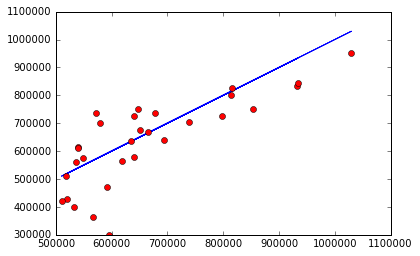

In [21]:
data = data1[:100]
train = data.iloc[:int(0.7*len(data)),]
valid = data.iloc[int(0.7*len(data)):,]
lm1 = smf.ols(formula = 'sale_price ~ gross_sq_feet', data = train).fit()
lmy = lm1.predict(valid)
plt.plot(lmy, lmy, 'b-')
plt.plot(lmy, valid.sale_price,'or')
R2 = 1-sum(pow(lmy-valid.sale_price,2))/sum(pow(valid.sale_price-mean(valid.sale_price),2))
print('Validation R^2 is %f'%R2)
print(lm1.summary())

# Example 2.
### Multivariate regression with housing price data

In [27]:
# Q1. (Same dataset) First extract the "year" from "sale_date", then subtract the "year_built" to obtain the "year_gap"
    # -- How old is that house when it was sold? Create a column contain this information
# Q2. Now regress the sale price over
    # residential_units
    # land_sq_feet
    # gross_sq_feet
    # year_gap
# Q3. How does our model look like? Observe how p-values and confidence intervals changed compared to example 1.
# Q4. Simply remove the features with high p-value then re-run the regression, what happens?
# Q5. (Experiment this if time permits) What if we just randomly remove a feature regardless of its p-value?

In [23]:
year_sale = lambda s:int(s[:4])
data1['year_gap'] = data1.sale_date.apply(year_sale) - data1.year_built

Validation R^2 is 0.559356
                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     2.997
Date:                Wed, 28 Sep 2016   Prob (F-statistic):             0.0247
Time:                        11:52:56   Log-Likelihood:                -948.16
No. Observations:                  70   AIC:                             1906.
Df Residuals:                      65   BIC:                             1918.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept  

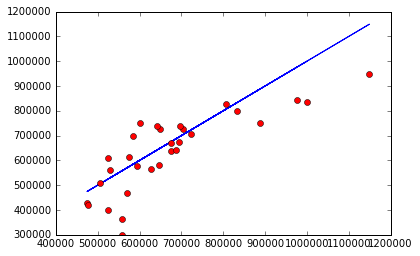

In [24]:
data = data1[:100]
train = data.iloc[:int(0.7*len(data)),]
valid = data.iloc[int(0.7*len(data)):,]
lm1 = smf.ols(formula = 'sale_price ~ land_sq_feet + gross_sq_feet + residential_units + year_gap', data = train).fit()
lmy = lm1.predict(valid)
plt.plot(lmy, lmy, 'b-')
plt.plot(lmy, valid.sale_price,'or')
R2 = 1-sum(pow(lmy-valid.sale_price,2))/sum(pow(valid.sale_price-mean(valid.sale_price),2))
print('Validation R^2 is %f'%R2)
print(lm1.summary())

## In this summary table we can see that the coefficients are implying:
* Avg. Base price   \$21,750
* Avg. Price per Sq.Foot (land)  \$54.7245
* Ave. Price per Sq.Foot (gross) \$83.5590
* Avg. Additional Price per Residential Units \$-2860.9559
* Avg. Additional Price per Year Gap \$1089.0144

### So the older the house, the higher the price. Do you believe this?

In [35]:
# We may have some houses sold before complete construction, or they record the data wrong in the first place
data.loc[data.year_gap<0,]

,zip_code,residential_units,land_sq_feet,gross_sq_feet,year_built,sale_price,sale_date,year_gap
31,11204,2,2517,3150,2009,870000,2007-05-11,-2
42,11204,2,4000,3600,2006,750000,2003-12-26,-3


### Experiment 1. Drop the "year_gap":

Validation R^2 is 0.600341
                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     3.673
Date:                Wed, 28 Sep 2016   Prob (F-statistic):             0.0164
Time:                        12:05:34   Log-Likelihood:                -948.68
No. Observations:                  70   AIC:                             1905.
Df Residuals:                      66   BIC:                             1914.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept  

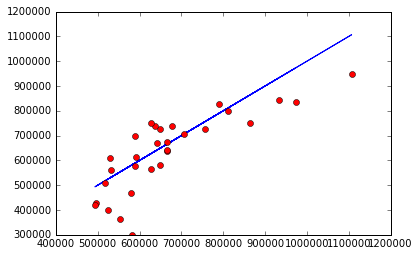

In [25]:
lm1 = smf.ols(formula = 'sale_price ~ land_sq_feet + gross_sq_feet + residential_units', data = train).fit()
lmy = lm1.predict(valid)
plt.plot(lmy, lmy, 'b-')
plt.plot(lmy, valid.sale_price,'or')
R2 = 1-sum(pow(lmy-valid.sale_price,2))/sum(pow(valid.sale_price-mean(valid.sale_price),2))
print('Validation R^2 is %f'%R2)
print(lm1.summary())

### Observations:
* Validation $R^2$ increases
* The coefficient of Residential Units flipped the sign

### Now we even drop the feature "residential_units", and validation $R^2$ drops slightly but still higher than original model

Validation R^2 is 0.593962
                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     5.588
Date:                Wed, 28 Sep 2016   Prob (F-statistic):            0.00569
Time:                        12:07:21   Log-Likelihood:                -948.68
No. Observations:                  70   AIC:                             1903.
Df Residuals:                      67   BIC:                             1910.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept       3.3

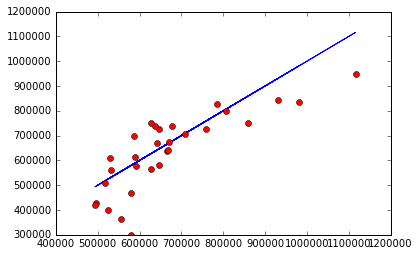

In [26]:
lm1 = smf.ols(formula = 'sale_price ~ land_sq_feet + gross_sq_feet', data = train).fit()
lmy = lm1.predict(valid)
plt.plot(lmy, lmy, 'b-')
plt.plot(lmy, valid.sale_price,'or')
R2 = 1-sum(pow(lmy-valid.sale_price,2))/sum(pow(valid.sale_price-mean(valid.sale_price),2))
print('Validation R^2 is %f'%R2)
print(lm1.summary())

### Example 3. Feature selection based on maximizing validation $R^2$, rather than p-values

In [12]:
n = 15
random.seed(2015)

col = []
for i in range(n):
    col.append('x%d'%(i+1))

X = pd.DataFrame(np.random.randn(50*n).reshape(50,n))
Y = X.ix[:,:3].sum(axis = 1) + np.random.normal(0,1.1,50)
data2 = pd.concat((Y,X), axis = 1)
data2.columns = ['Y'] + col
train = data2[:20]
valid = data2[20:]
# formstr = 'Y ~ -1+'+' + '.join(col)
# lm1 = smf.ols(formula=formstr, data = train).fit()
# lmy1 = lm1.predict(valid)
# R2v = 1 - ((lmy1-valid.Y)**2).sum() / ((valid.Y-valid.Y.mean())**2).sum()
# print('Validation R2 for 20 regressors is {0}'.format(R2v))

def regress(mask):
    formstr='Y~-1'
    for i in range(0,len(mask)):
        if mask[i]==1:
            formstr += '+x%d'%(i+1)
    lm2 = smf.ols(formula=formstr, data = train).fit()
    lmy2 = lm2.predict(valid)
    R2 = 1-sum(pow(lmy2-valid.Y,2))/sum(pow(valid.Y-mean(valid.Y),2))#*(n-1)/(n-sum(mask)-1)
    return (R2,lm2)

def DropP(threshold = 1):
    mask_p = b.Pvalues < threshold
    print('Validation R^2 is %f'%regress(mask_p)[0])
    print(regress(mask_p)[1].summary())

def FindBestI():
    mask0 = [0] * n  #initially exclude all regressors
    r2_0 = 0
    ix = []
    while True:
        bestI = -1 #best regressor to exclude
        for i in range(0,n):
            if (mask0[i] == 0):
                mask = mask0[:]
                mask[i] = 1
                r2 = regress(mask)[0]
                #print((i,r2,r20))
                if (r2 > r2_0):
                    r2_0 = r2
                    bestI = i
        if (bestI >= 0):
            mask0[bestI] = 1
            ix.append('x%d'%(bestI+1))
            #print((bestI,r2_0))
            #print(regress(mask0)[-1])
        else:
            break
    return mask0, ix

mask0, ix = FindBestI()
(r2_best,lm_best) = regress(mask0)
(r2_1,lm_1) = regress([1]*n)

#print(lm.summary())
#ix
#np.abs((data.corr() - np.eye(n+1))).max().max()
b = pd.DataFrame({'Pvalues':lm_1.pvalues, 'Keeper':col})
c = 'greenyellow'
def highlight_pval(val):
    color = c if val in ix else 'white'
    return 'background-color: %s'% color
# 'color: %s' % color
b.style.\
    applymap(highlight_pval, subset=['Keeper']).\
    bar(subset = ['Pvalues'], color=c)

### So this means we should select $x_1, x_2, x_3, x_4, x_{14}, x_{15}$ if we want to maximize validation $R^2$, which is about 0.776

In [13]:
print('Validation R^2 is %f'%r2_best)
print(lm_best.summary())

Validation R^2 is 0.776078
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     4.841
Date:                Wed, 28 Sep 2016   Prob (F-statistic):            0.00711
Time:                        11:35:11   Log-Likelihood:                -35.343
No. Observations:                  20   AIC:                             82.69
Df Residuals:                      14   BIC:                             88.66
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.1879    

### For comparison, if we only select the first four:

In [14]:
(r2_2,lm_2) = regress([1]*4+[0]*(n-4))
print('Validation R^2 is %f'%r2_2)
print(lm_2.summary())

Validation R^2 is 0.768779
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     8.243
Date:                Wed, 28 Sep 2016   Prob (F-statistic):           0.000829
Time:                        11:35:11   Log-Likelihood:                -35.387
No. Observations:                  20   AIC:                             78.77
Df Residuals:                      16   BIC:                             82.76
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.1942    

### If we remove variables based on their p-value (if > 0.2), then we'll keep $x_2,x_3,x_6,x_9,x_{10},x_{12},x_{13}, x_{15}$, and the model's out of sample $R^2$ is ridiculously dropping to -1.73

In [15]:
DropP(0.2)

Validation R^2 is -1.730000
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     10.16
Date:                Wed, 28 Sep 2016   Prob (F-statistic):           0.000268
Time:                        11:35:12   Log-Likelihood:                -26.064
No. Observations:                  20   AIC:                             68.13
Df Residuals:                      12   BIC:                             76.09
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x2             1.1917   

### At last, what about the "true" model that y is the sum of $x_1, x_2, x_3$?
### (The validation $R^2$ drops significantly--although $x_4$ has high p-value, we can't remove it without jeopardizing our predication accuracy)

In [16]:
(r2_3,lm_3) = regress([1]*3+[0]*(n-3))
print('Validation R^2 is %f'%r2_3)
print(lm_3.summary())

Validation R^2 is 0.495947
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     8.759
Date:                Wed, 28 Sep 2016   Prob (F-statistic):           0.000982
Time:                        11:35:12   Log-Likelihood:                -37.230
No. Observations:                  20   AIC:                             80.46
Df Residuals:                      17   BIC:                             83.45
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.6648    

### Only for reference: all variables included

In [17]:
DropP(1)

Validation R^2 is -2.070932
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     5.809
Date:                Wed, 28 Sep 2016   Prob (F-statistic):             0.0310
Time:                        11:35:12   Log-Likelihood:                -17.435
No. Observations:                  20   AIC:                             64.87
Df Residuals:                       5   BIC:                             79.81
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.8006   